In [150]:
import numpy as np
import pandas as pd


In [151]:
import random
random.seed(42)

In [152]:
dataset = pd.read_csv('APPLE.csv',encoding='utf8')
dataset 

,Date,close,open,high,low,count,zhangdie
0,2021年7月30日,145.86,144.38,146.33,144.11,70.44M,0.15%
1,2021年7月29日,145.64,144.67,146.54,144.63,56.70M,0.46%
2,2021年7月28日,144.98,144.79,146.92,142.62,118.93M,-1.22%
3,2021年7月27日,146.77,149.06,149.16,145.57,104.82M,-1.49%
4,2021年7月26日,148.99,148.25,149.82,147.75,72.43M,0.29%
...,...,...,...,...,...,...,...
353,2020年3月6日,72.26,70.50,72.71,70.31,226.18M,-1.33%
354,2020年3月5日,73.23,73.88,74.89,72.85,187.57M,-3.24%
355,2020年3月4日,75.68,74.11,75.85,73.28,219.18M,4.64%
356,2020年3月3日,72.33,75.92,76.00,71.45,319.48M,-3.18%


In [153]:
dataset = dataset.dropna()
dataset = dataset[['open', 'high', 'low', 'close']]

In [154]:
import talib

In [155]:
dataset['H-L'] = dataset['high'] - dataset['low']
dataset['O-C'] = dataset['close'] - dataset['open']
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['high'].values, dataset['low'].values, dataset['close'].values, 7)

In [156]:
dataset.head(20)

,open,high,low,close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R
0,144.38,146.33,144.11,145.86,2.22,1.48,NaN,NaN,NaN,NaN,NaN,NaN
1,144.67,146.54,144.63,145.64,1.91,0.97,NaN,NaN,NaN,NaN,NaN,NaN
2,144.79,146.92,142.62,144.98,4.30,0.19,NaN,NaN,NaN,NaN,NaN,NaN
3,149.06,149.16,145.57,146.77,3.59,-2.29,145.493333,NaN,NaN,NaN,NaN,NaN
4,148.25,149.82,147.75,148.99,2.07,0.74,145.796667,NaN,NaN,1.558772,NaN,NaN
5,147.55,148.72,146.92,148.56,1.80,1.01,146.913333,NaN,NaN,1.758968,NaN,NaN
6,145.94,148.19,145.81,146.80,2.38,0.86,148.106667,NaN,NaN,1.606627,NaN,-41.944444
7,145.53,146.13,144.63,145.40,1.50,-0.13,148.116667,NaN,NaN,1.464968,NaN,-61.388889
8,143.46,147.10,142.96,146.15,4.14,2.69,146.920000,NaN,NaN,1.545493,NaN,-50.972222
9,143.75,144.07,141.67,142.45,2.40,-1.30,146.116667,NaN,NaN,2.241466,36.813612,-90.429448


In [157]:
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)

In [158]:
dataset = dataset.dropna()

In [159]:
dataset.head(5)

,open,high,low,close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
30,129.94,132.54,129.66,131.79,2.88,1.85,132.246667,134.230,141.765333,1.442352,28.170832,-51.320755,0
31,130.26,130.89,128.49,130.15,2.40,-0.11,131.516667,133.682,141.296333,1.541113,24.381616,-72.425249,0
32,130.07,130.59,129.41,129.64,1.18,-0.43,130.800000,133.001,140.780000,1.128127,23.285843,-80.240550,1
33,127.70,130.48,127.10,130.48,3.38,2.78,130.526667,132.332,140.268667,0.795003,29.183182,-51.575931,0
34,126.53,127.44,126.10,127.35,1.34,0.82,130.090000,131.902,139.725667,1.623228,22.070786,-80.590062,0


In [160]:
dataset.shape

(328, 13)

In [161]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [162]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R
30,2.88,1.85,132.246667,134.230,141.765333,1.442352,28.170832,-51.320755
31,2.40,-0.11,131.516667,133.682,141.296333,1.541113,24.381616,-72.425249
32,1.18,-0.43,130.800000,133.001,140.780000,1.128127,23.285843,-80.240550
33,3.38,2.78,130.526667,132.332,140.268667,0.795003,29.183182,-51.575931
34,1.34,0.82,130.090000,131.902,139.725667,1.623228,22.070786,-80.590062
...,...,...,...,...,...,...,...,...
353,2.40,1.76,68.910000,64.222,64.794000,4.097890,60.463496,-3.540519
354,2.04,-0.65,70.043333,65.717,64.895000,2.720061,61.643239,-12.878200
355,2.57,1.57,70.676667,66.921,64.979333,3.361513,64.641246,-1.227437
356,4.55,-3.59,73.723333,68.322,65.113000,3.355707,57.703417,-35.804878


In [163]:
y

30     0
31     0
32     1
33     0
34     0
      ..
353    1
354    1
355    0
356    1
357    0
Name: Price_Rise, Length: 328, dtype: int32

In [164]:
split = int(len(dataset)*0.7)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
X_train.shape

(229, 8)

In [167]:
X_test.shape

(99, 8)

In [168]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [169]:
classifier = Sequential()

In [170]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [171]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [172]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [173]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [174]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.6681
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.8210
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.7991
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.8384
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.8472
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.8341
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.8384
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.8515
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.8472
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.8603
Epoch 11/50
23/23 [

In [175]:
y_pred = classifier.predict(X_test)

In [176]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [177]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1] = y_pred
trade_dataset = dataset.dropna()

In [1]:
trade_dataset

NameError: name 'trade_dataset' is not defined

In [179]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)


<ipython-input-179-52d0b1845e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = 0.
<ipython-input-179-52d0b1845e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
<ipython-input-179-52d0b1845e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [180]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

<ipython-input-180-c8d278af7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = 0.
<ipython-input-180-c8d278af7601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


In [184]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(abs(trade_dataset['Tomorrows Returns']))
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


<ipython-input-184-ab5c8423ce24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Market Returns'] = np.cumsum(abs(trade_dataset['Tomorrows Returns']))
<ipython-input-184-ab5c8423ce24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


In [185]:
trade_dataset.head(10)

,open,high,low,close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
259,99.17,99.25,96.74,97.00,2.51,-2.17,94.243333,98.689,112.192333,2.206880,35.983782,-22.255193,1,False,0.013923,-0.013923,0.013923,-0.013923
260,96.42,98.50,96.06,98.36,2.44,1.94,95.706667,97.422,110.953000,2.686423,40.446844,-8.803165,0,False,-0.020854,0.020854,0.034778,0.006931
261,96.99,97.15,95.84,96.33,1.31,-0.66,97.543333,96.364,109.930333,2.095154,36.207916,-28.882295,1,False,0.001970,-0.001970,0.036748,0.004961
262,96.56,97.40,95.90,96.52,1.50,-0.04,97.230000,95.371,108.981000,0.799331,36.904192,-27.002967,1,False,0.012356,-0.012356,0.049104,-0.007395
263,98.99,99.25,96.49,97.72,2.76,-1.27,97.070000,95.404,108.031333,0.847691,41.445255,-21.132597,0,False,-0.006777,0.006777,0.055881,-0.000618
264,94.84,97.25,93.88,97.06,3.37,2.22,96.856667,95.672,107.071333,0.844820,39.678301,-40.782123,0,False,-0.016413,0.016413,0.072294,0.015794
265,97.26,99.96,95.26,95.48,4.70,-1.78,97.100000,96.053,106.146000,0.836254,35.591678,-73.684211,1,True,0.004598,0.004598,0.076891,0.020392
266,95.33,95.98,94.71,95.92,1.27,0.59,96.753333,96.120,105.133333,0.890393,37.604983,-66.447368,0,False,-0.002505,0.002505,0.079396,0.022897
267,96.26,96.32,94.67,95.68,1.65,-0.58,96.153333,96.451,104.185000,0.970732,36.897245,-70.394737,0,False,-0.003560,0.003560,0.082956,0.026457
268,94.18,95.38,94.09,95.34,1.29,1.16,95.693333,96.734,103.431667,0.686353,35.822745,-75.986842,0,False,-0.023024,0.023024,0.105980,0.049481


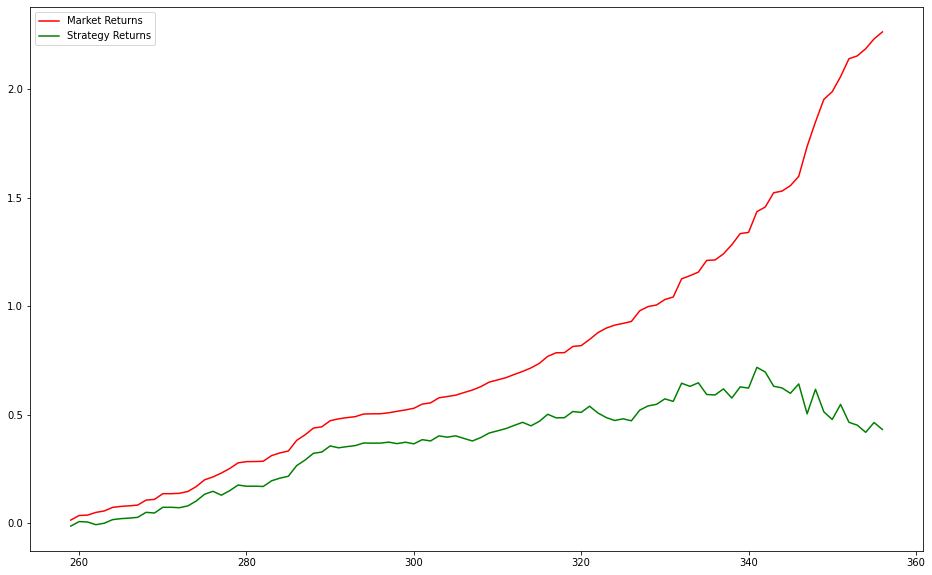

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()
